In [ ]:
# Auto Price Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy.stats import  norm
import missingno as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df =pd.read_csv("data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  Price              11914 non-null  int64  
dtypes: float64(3), int64(5

In [74]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Price
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [4]:
df = df.rename(columns={'MSRP':'Price'})

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Features info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  Price              11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
# Looks like some missing values are present

# Target Feature 

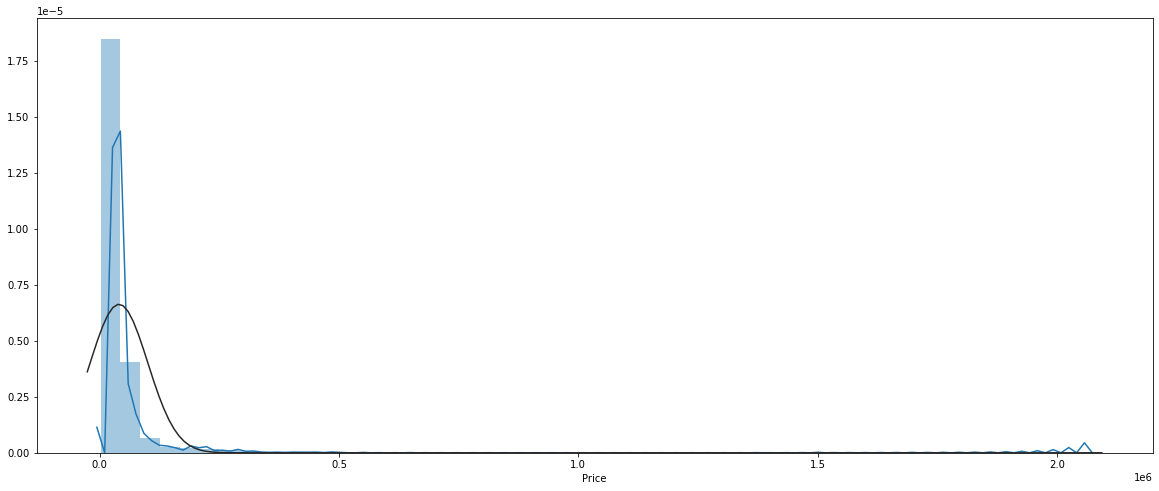

In [8]:
plt.figure(figsize=(20,8))
sns.distplot(df['Price'],fit=norm)

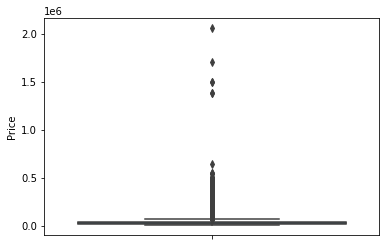

In [9]:
sns.boxplot(df['Price'],orient='v')

In [10]:
# The above two plots shows the existence of mathematical outliers for the target column price .We will be dealing with the outliers after the base model creation

# Categorical features and its levels

In [11]:
{column : df[column].nunique() for column in df.select_dtypes("object").columns}

{'Make': 48,
 'Model': 915,
 'Engine Fuel Type': 10,
 'Transmission Type': 5,
 'Driven_Wheels': 4,
 'Market Category': 71,
 'Vehicle Size': 3,
 'Vehicle Style': 16}

In [12]:
# Observation : Model feature has many levels of classes and is a high cardinality feature and thus one hot encoding to be applied 

# Missing values : Numerical 

In [13]:
df.isna().sum().sum()

3850

In [14]:
mss  = list(df.columns[df.isna().sum()>0])
mss

['Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'Market Category']

# Missing Values : Graphical 

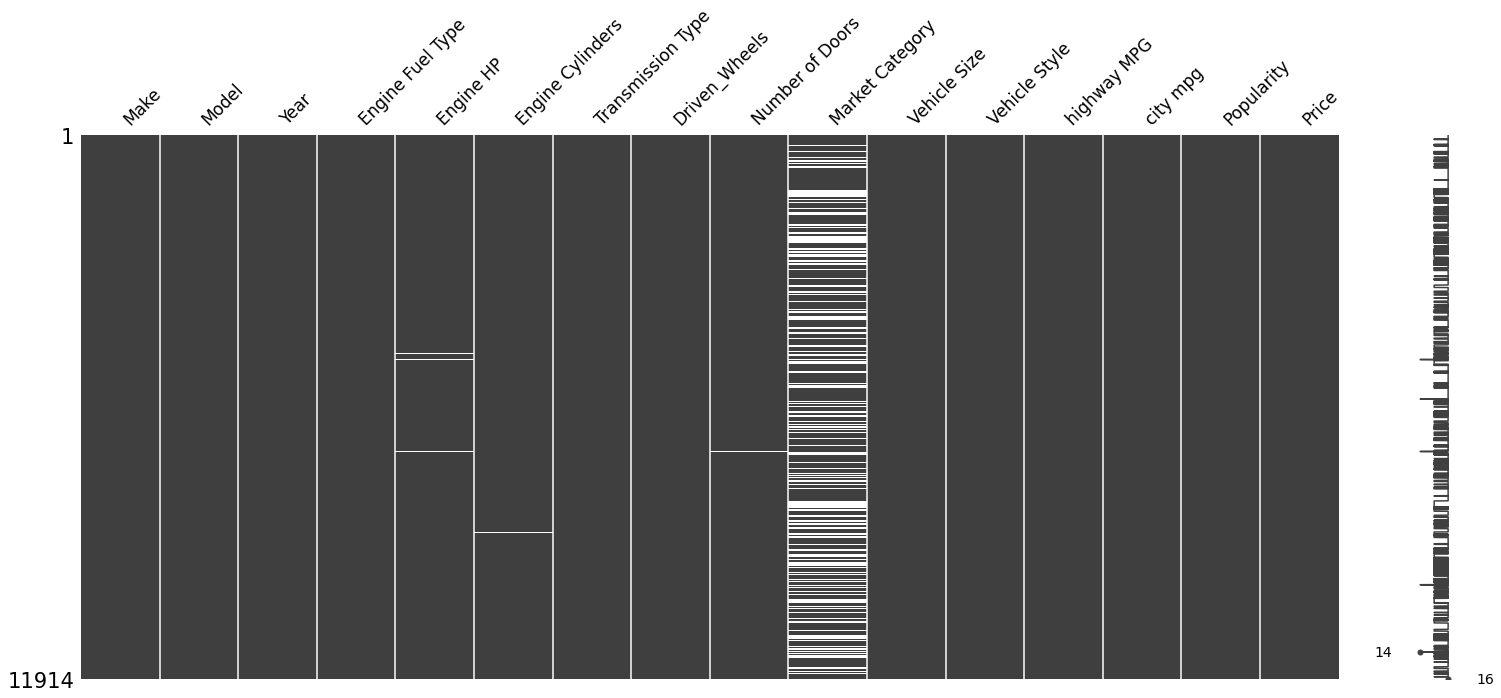

In [15]:
ms.matrix(df,figsize=(25, 10),fontsize=17)

# CATEGORICAL MISSING VALUES

In [16]:
cat_miss = [ i for i in list(df.columns[df.isna().sum()>0])  if  i in list(df.select_dtypes("object")) ]

In [17]:
cat_miss

['Engine Fuel Type', 'Market Category']

In [18]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
df['Engine Fuel Type'].value_counts(dropna=False)

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
NaN                                                3
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [20]:
df.loc[(df['Engine Fuel Type'].isna()),:]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [21]:
# Extraction done based on the make "Suzuki" since three missing values are from suzuki make 
(df.loc[(df['Make'] == 'Suzuki'),'Engine Fuel Type'])

1300     regular unleaded
1301     regular unleaded
1302     regular unleaded
1303     regular unleaded
1304     regular unleaded
               ...       
11722    regular unleaded
11723    regular unleaded
11724    regular unleaded
11725    regular unleaded
11726    regular unleaded
Name: Engine Fuel Type, Length: 351, dtype: object

In [22]:
# Now we check the unique values from the above series 
(df.loc[(df['Make'] == 'Suzuki'),'Engine Fuel Type']).unique()

array(['regular unleaded', nan], dtype=object)

In [23]:
# So the three mising  values be surely 'regularly unleaded' and so we impute with this feature 

In [24]:
df['Market Category'].isna().sum()

3742

In [25]:
# This feature  is to be  multihod encoded so we will impute the missing values with new category called "Missing"

# Numerical Missing Values

In [26]:
num_misses = df[mss].columns.difference(cat_miss)

In [27]:
num_misses

Index(['Engine Cylinders', 'Engine HP', 'Number of Doors'], dtype='object')

In [28]:
df['Engine Cylinders'].value_counts()

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64

In [29]:
df.loc[df['Engine Cylinders'].isna(),:]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800


In [30]:
df['Engine Cylinders'].isna().sum()

30

In [31]:
# We categorize based on the Fuel Type and then impute the most frequent/Unique value 

In [32]:
df.loc[df['Engine Cylinders'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Crossover,Midsize,4dr SUV,74,78,2031,49800


In [33]:
df.loc[(df['Engine Fuel Type']=='electric'),'Engine Cylinders'].value_counts(dropna=False)


0.0    56
NaN    10
Name: Engine Cylinders, dtype: int64

In [34]:
# So we impute the 10 above missing values with 0 

In [35]:
df.loc[(df['Engine Fuel Type']=='regular unleaded'),'Engine Cylinders'].value_counts(dropna=False)

4.0     3257
6.0     2859
8.0      812
5.0      203
3.0       30
12.0       8
NaN        3
Name: Engine Cylinders, dtype: int64

In [36]:
# We impute them with mode i.e 4 

In [37]:
df.loc[(df['Engine Fuel Type']=='premium unleaded (required)'),'Engine Cylinders'].value_counts(dropna=False)

6.0     779
8.0     594
4.0     352
12.0    194
10.0     67
NaN      17
16.0      3
5.0       3
Name: Engine Cylinders, dtype: int64

In [38]:
# We impute them with mode i.e 4 

In [39]:
df.loc[df['Engine HP'].isna()].head(20)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,64915
4203,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,30,23,5657,29100
4204,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,30850
4205,Ford,Escape,2017,regular unleaded,NaN,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Compact,4dr SUV,28,22,5657,26850


In [40]:
# We impute the Engine HP with mean since it is continuos variable

In [41]:
df['Number of Doors'].value_counts(dropna=False)

4.0    8353
2.0    3160
3.0     395
NaN       6
Name: Number of Doors, dtype: int64

In [42]:
df.loc[df['Number of Doors'].isna()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [43]:
# So we impute based on Tesla or Model S because both are sharing common observations

# Validation ------> df[df['Model']=='Model S'].shape
#                               df[df['Make']=="Tesla"].shape ...Both gives same shape which means we can impute with either of the two


df.loc[df['Make'] =='Tesla','Number of Doors'].value_counts(dropna=False)

4.0    13
NaN     5
Name: Number of Doors, dtype: int64

In [44]:
# Thus from the above  we impute the 5 missing values with 4 

In [45]:
df.loc[df['Make'] =='Ferrari','Number of Doors'].value_counts(dropna=False)

2.0    68
NaN     1
Name: Number of Doors, dtype: int64

In [46]:
# So we impute the 5 missing values with 2

# Encoding for Categoroical Features

In [47]:
{column : df[column].nunique() for column in df.select_dtypes("object").columns}

{'Make': 48,
 'Model': 915,
 'Engine Fuel Type': 10,
 'Transmission Type': 5,
 'Driven_Wheels': 4,
 'Market Category': 71,
 'Vehicle Size': 3,
 'Vehicle Style': 16}

# Encoding Appraches for this data

- Make : One Hot Encoding 
- Model : Once Hot Encoding 
- Engine Fuel Type : One Hot Encoding 
- Transmission Type: One Hot Encoding
-  Driven_Wheels:One Hot Encoding
- Market Category : Multi Hot Encoding
- Vehicle Size:Label Encoding
- Vehicle Style : One Hot Encoding

# Reason for Label Encoding Vehicle Size

In [48]:
grp = df[['Vehicle Size','Price']].groupby('Vehicle Size').mean().sort_values(by='Price',ascending=False)
grp

,Price
Vehicle Size,
Large,53890.500540
Midsize,39035.919049
Compact,34275.336482


- Thus we can see the change in mean price for different levels of Vehicle Size .
- so we can label encode as 0,1 & 2 respectively for compact,midsize and large

# Preprocessing 

In [49]:
cats = list(df.select_dtypes("object").columns)
cats

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [50]:
cats_1 = [ i for i in cats if (i != ('Vehicle Size' ) and (i != 'Market Category'))]
cats_1

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Style']

In [51]:
def MultiHotEncode(df,column):
    df = df.copy()
    df[column] = df[column].apply(lambda x : x.split(","))
    categories = np.unique(df[ column].sum())
    for cat in categories:
        df[column+':'+cat] = df.apply(lambda x : 1 if cat in x[column] else 0 ,axis=1)
    df= df.drop(column,axis=1)
    return df



In [52]:
def one_hot_encode(df,column):
    df = df.copy()
    dummies = pd.get_dummies(df[column],prefix=column,drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(column,axis=1)
    
    return df




In [53]:
def preprocessing_df(df):
    
    df = df.copy()
    
    # Missing value impute for Market Catgory to apply the split method & Multi hot encoding 
    
    df['Market Category']= df['Market Category'].fillna('Missing')
    
   # Missing Value Imputation
#     df['Engine Fuel Type ']= df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])
    df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].mode()[0])
    df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].mean())
    df['Number of Doors'] = df.groupby(by= 'Make')['Number of Doors'].transform(lambda x : x.fillna(x.mode()[0]))
    
    # MultiHot Encoding for Market Category columns
    
    df = MultiHotEncode(df,column='Market Category')
    
    # One Hot encoding 
    for column in cats_1:
        print(column)
        df = one_hot_encode(df,column)
        
    # Label Encoding 
    df['Vehicle Size'] = df['Vehicle Size'].replace({'Compact':0,'Midsize':1,'Large':2})
    
    X = df.drop('Price',axis=1)
    y = df['Price']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
     
#     Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [54]:
X_train, X_test, y_train, y_test = preprocessing_df(df)

Make
Model
Engine Fuel Type
Transmission Type
Driven_Wheels
Vehicle Style


In [55]:
X_train.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,Market Category:Crossover,Market Category:Diesel,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
8387,0.743963,-0.670726,-0.913270,0.635529,0.216125,0.483574,0.490680,0.320496,2.226304,-0.1358,...,-0.268564,-0.05259,-0.330015,-0.245493,-0.233742,-0.190829,-0.100874,-0.177965,-0.593462,-0.230586
3997,-0.580046,0.459127,1.336087,0.635529,1.501622,-0.963851,-0.769952,-0.702372,-0.449175,-0.1358,...,-0.268564,-0.05259,-0.330015,-0.245493,-0.233742,-0.190829,-0.100874,-0.177965,-0.593462,-0.230586
11563,0.611562,0.477351,-0.913270,0.635529,0.216125,0.372234,0.261474,-0.480819,2.226304,-0.1358,...,-0.268564,-0.05259,-0.330015,-0.245493,-0.233742,-0.190829,-0.100874,-0.177965,-0.593462,-0.230586
10137,0.214360,-0.907631,-0.913270,0.635529,-1.069372,0.706255,0.376077,-0.749305,-0.449175,-0.1358,...,-0.268564,-0.05259,-0.330015,-0.245493,-0.233742,-0.190829,-0.100874,-0.177965,1.685028,-0.230586
5045,0.876364,-0.169581,-0.913270,0.635529,0.216125,0.483574,0.146872,2.823141,-0.449175,-0.1358,...,-0.268564,-0.05259,-0.330015,-0.245493,-0.233742,-0.190829,-0.100874,-0.177965,1.685028,-0.230586


In [56]:
models = {
    
'Linear' : LinearRegression(),
'DecisionTreeReg':DecisionTreeRegressor(),
'RandomForestReg':RandomForestRegressor(),
'KNearestNeighbors':KNeighborsRegressor(),
   
}

In [57]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+'  is  '+'trained')

Linear  is  trained
DecisionTreeReg  is  trained
RandomForestReg  is  trained
KNearestNeighbors  is  trained


In [66]:
for name,model in models.items():
    y_pred = model.predict(X_test)
    print(name+'::::')
    print("MeanAbsoluteError : {:.2f}".format(mean_absolute_error(y_test,y_pred)))
    print("MeanSquaredError : {:.2f}".format(mean_squared_error(y_test,y_pred)))
    print("RootMeanSquaredError : {:.2f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
    print("R^2 Score :{:.2f}".format(model.score(X_test,y_test)))
    print("R^2 Score :{:.2f}".format(r2_score(y_test,y_pred)))
    print()
    
      

Linear::::
MeanAbsoluteError : 3326952300309904.00
MeanSquaredError : 3649350602742637953432064171704320.00
RootMeanSquaredError : 60409855178957664.00
R^2 Score :-1041842725875974590693376.00
R^2 Score :-1041842725875974590693376.00

DecisionTreeReg::::
MeanAbsoluteError : 3272.07
MeanSquaredError : 102256602.63
RootMeanSquaredError : 10112.20
R^2 Score :0.97
R^2 Score :0.97

RandomForestReg::::
MeanAbsoluteError : 3064.77
MeanSquaredError : 120593813.79
RootMeanSquaredError : 10981.52
R^2 Score :0.97
R^2 Score :0.97

KNearestNeighbors::::
MeanAbsoluteError : 6631.52
MeanSquaredError : 1017754241.38
RootMeanSquaredError : 31902.26
R^2 Score :0.71
R^2 Score :0.71



# Principal Component Analysis For dimensionality Reduction

In [67]:
n_components=100
pca = PCA(n_components=n_components)

In [68]:
pca.fit(X_train)
X_train_reduced = pd.DataFrame(pca.transform(X_train),index=X_train.index,columns=["PCA"+str(i) for i in range(1,n_components+1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test),index=X_test.index,columns=["PCA"+str(i) for i in range(1,n_components+1)])

# Model Evaluation using PCA features 

In [69]:
for name,model in models.items():
    model.fit(X_train_reduced,y_train)
    print(name+'  is  '+'trained')

Linear  is  trained
DecisionTreeReg  is  trained
RandomForestReg  is  trained
KNearestNeighbors  is  trained


In [72]:
for name,model in models.items():
    y_pred = model.predict(X_test_reduced)
    print(name+'::::')
    print("MeanAbsoluteError : {:.2f}".format(mean_absolute_error(y_test,y_pred)))
    print("MeanSquaredError : {:.2f}".format(mean_squared_error(y_test,y_pred)))
    print("RootMeanSquaredError : {:.2f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
    print("R^2 Score :{:.2f}".format(model.score(X_test_reduced,y_test)))
    print("R^2 Score :{:.2f}".format(r2_score(y_test,y_pred)))
    print()
    

Linear::::
MeanAbsoluteError : 10143.84
MeanSquaredError : 527419273.58
RootMeanSquaredError : 22965.61
R^2 Score :0.85
R^2 Score :0.85

DecisionTreeReg::::
MeanAbsoluteError : 3766.62
MeanSquaredError : 150339136.26
RootMeanSquaredError : 12261.29
R^2 Score :0.96
R^2 Score :0.96

RandomForestReg::::
MeanAbsoluteError : 3877.42
MeanSquaredError : 192776302.68
RootMeanSquaredError : 13884.39
R^2 Score :0.94
R^2 Score :0.94

KNearestNeighbors::::
MeanAbsoluteError : 5127.97
MeanSquaredError : 621754398.62
RootMeanSquaredError : 24935.00
R^2 Score :0.82
R^2 Score :0.82



In [76]:
pca.explained_variance_ratio_

array([0.00714261, 0.00551551, 0.00486109, 0.00409368, 0.00339329,
       0.00320989, 0.00302751, 0.00298993, 0.00260777, 0.00255066,
       0.00247536, 0.00239892, 0.00235901, 0.00230733, 0.00229972,
       0.00223946, 0.00221085, 0.00218875, 0.00216916, 0.00215288,
       0.002123  , 0.0021059 , 0.00210238, 0.00208975, 0.00207977,
       0.00207622, 0.00207038, 0.00206492, 0.00205774, 0.00205576,
       0.0020526 , 0.00204906, 0.0020448 , 0.00204383, 0.00204063,
       0.00203712, 0.00203661, 0.0020337 , 0.00203193, 0.00202885,
       0.00202536, 0.00202373, 0.0020229 , 0.00202259, 0.00202236,
       0.00201003, 0.00200647, 0.00199286, 0.00197119, 0.00195431,
       0.00192042, 0.00190038, 0.00188003, 0.00183547, 0.00180865,
       0.00179664, 0.00178182, 0.00175839, 0.00171019, 0.00168167,
       0.001656  , 0.00164697, 0.00161251, 0.00159916, 0.00154249,
       0.00153357, 0.00149937, 0.00148552, 0.00142046, 0.0013732 ,
       0.00133282, 0.00132238, 0.00125461, 0.00124062, 0.00122

# Visualization of principle components for the variablity of the features ( Used to check for the least no of dimensions)

In [77]:
# plt.figure(figsize=(8,6))
# plt.scatter(X_train_reduced[:,0],X_train_reduced[:,1],c=y_train,cmap='plasma')
# plt.xlabel('First principal component')
# plt.ylabel('Second Principal Component')

- Fine tuning on the data using log transformations on the target variable . 
- The log transformations changes the shape of the data's distribution and can be used mostly for the right skewed distribution

# Select right/Sufficient  number of dimensions

- The  process of dropping the variable and training again and again  works well if the number of dimensions are small.

- But, it is quite cumbersome if we have large number of dimensions.

- In that case, a better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

- The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [79]:
pca_sum = PCA()
pca_sum.fit(X_train)
cumsum = np.cumsum(pca_sum.explained_variance_ratio_)
dim = np.argmax(cumsum>=0.90)+1
print("The required number of dimensions for the 90 % variablity explaination from the features would be ",dim , "Out of  1011")

The required number of dimensions for the 90 % variablity explaination from the features would be  801 Out of  1011


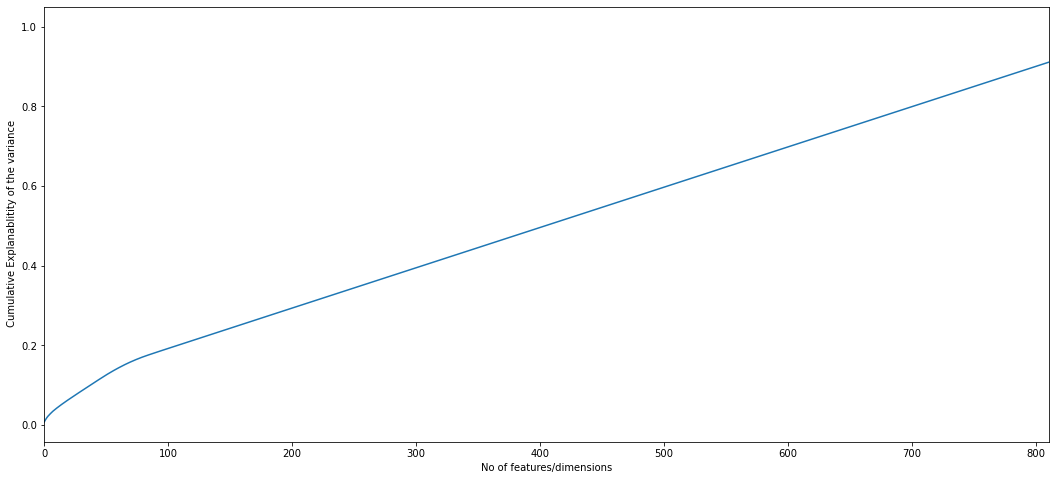

In [82]:
plt.figure(figsize=(18,8))
plt.plot(np.cumsum(pca_sum.explained_variance_ratio_))
plt.xlim(0,810,20)
plt.xlabel("No of features/dimensions")
plt.ylabel(" Cumulative Explanablitity of the variance")
plt.show()
        
